## hw1pr1: <i>Files!</i>
+ walking through folders and files  (500 files - or many more!)
+ analyzing, counting, inquiring, and <i>insight-producing</i> as we go!  

In [38]:
# Where are we?
%pwd

'/Users/isabelburger/Documents/Classes/CS035/hw1'

In [49]:
%cd '/Users/isabelburger/Documents/Classes/CS035/hw1'

/Users/isabelburger/Documents/Classes/CS035/hw1


By the way, when I run the above cell on my desktop machine (Mac), the response is

``'/Users/zacharydodds/Desktop/cs35/week1/starting_notebooks'``

on a Windows laptop, the path uses a different separator. Mine is

``'c:\\Users\\dodds\\OneDrive\\Desktop\\cs35\\week1\\starting_notebooks'``

Your results will almost certainly differ.

In fact, if they *don't* differ ... I'm _very_ interested! 🤔 🦔

In [35]:
# what's here?
%ls

files_challenge/                    hw1ss1.pdf
files_challenge.zip                 hw1ss2.pdf
get_files_challenge_and_place_here/ intro_first/
hw1pr0.ipynb                        intro_first_ss_small.png
hw1pr1.ipynb                        intro_second/


In [36]:
# to move around:  cd stands for "change directory" (a directory is a folder)
#    %cd intro_first    would move into the intro_first folder
#    %cd .. moves "up" to the containing directory
#    %cd .  doesn't move at all:  .  represents the current directory    

# For now, let's not move anywhere
%cd ./CS035/hw1

[Errno 2] No such file or directory: './CS035/hw1'
/Users/isabelburger/Documents/Classes/CS035/hw1


In 2024, my Mac setup succeeds with a ``UserWarning`` that tells me to install the ``pickleshare`` library.

I refuse based on snack-sharing principles!

One can only share freely, not under admonishment/warning!

(If this happens to you - let me know and we'll fix it...)

In [24]:
# we will use a few file-handling "system" libraries. 
# These are built-in to python, so nothing to install - just to import:
import os
import os.path

On first glance, it seems we can't open the file ``nottrue.ipynb`` ...

It's in the folder ``intro_first`` -- see if you can open it ...

In [39]:
#
# In fact, we can read it - it's just not a .ipynb file!
#
# Try it here, for your system:

print("+++ Contents of the file nottrue.ipynb: +++\n")

#Mac:    !cat  <filepath>  using forward slashes
#
# !cat ./intro_first/nottrue.ipynb       

# Windows:  type <filepath>  using backslashes
#
# !type .\\intro_first\\nottrue.ipynb       

+++ Contents of the file nottrue.ipynb: +++



We *could* use the command-line ``cat`` or ``type`` one file at a time ...

But, what if we have to walk _500 files_ ?!  <font size="-2">(Alas, this joke stays around for at least this whole week!)</font>

  + Then, we need a function - and script - to access its contents. 
  + We started this last week, let's revisit it again here:

In [50]:
#
# function to return the contents of a file (as one-big-string)
#

def GET_STRING_FROM_FILE(filename_as_string):
    """ return all of the contents from the file, filename
        will error if the file is not present, then return the empty string ''
    """
    try:
        # the encoding below is a common default, but not universal...
        file_object = open(filename_as_string, "r", encoding='utf-8')    # open! (Other encodings: 'latin-1', 'utf-16', 'utf-32') 
        file_data = file_object.read()                                   # and get all its contents
        file_object.close()                                              # close the file (optional)
        #print(DATA)                                                     # if we want to see it
        return file_data                                                 # definitely want to return it!
    except FileNotFoundError:                             # it wasn't there
        print(f"file not found: {filename_as_string}")    # print error
        return ''                                         # return empty string ''
    except UnicodeDecodeError:
        print(f"decoding error: {filename_as_string}")    # encoding/decoding error  
        return ''                                         # return empty string ''


full_file_path = "./intro_first/nottrue.ipynb"
file_contents = GET_STRING_FROM_FILE(full_file_path)      # reminder: file_contents = file_data from above

# Let's print only some of this potentially large string, adapting as needed:
print("file_contents:\n\n", file_contents[0:42])          # let's then increase the 42...

file_contents:

 Hi, everyone in cs35!

As you're seeing, t


Notice that, in Python, the Mac/forwardslash/style paths work, _even on Windows_

In [51]:
####  Let's try one of the other files!  (or a non-existent file!)

full_file_path = "./intro_first/cs/file35.txt"    # how about the others?!
file_contents = GET_STRING_FROM_FILE(full_file_path)     
print("file_contents:\n\n", file_contents[0:42])

file_contents:

 CS for Insight


#### But, we have 500 files...

Let's write <font color="DodgerBlue">_steppingstone_ functions</font> to make sense of our 500 files...

Let's start by reminding ourselves we can write a function that returns.

We'll call this Version 0:

In [52]:
#
# Steppingstone, Version 0: does Python work?
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    return 42  # just to check that it's working (v0)    

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 42

[[ Fin. ]]


<hr>

#### Introducing ``os.walk``

The function ``os.walk(path)`` will walk _any number_ of files...

Before we write a function, let's try  ``os.walk`` immediately:

In [53]:
# os.walk returns the structure of a folder (directory)

# Here, we "walk" the intro_examples subfolder:
all_files = os.walk("./intro_first")

all_files     # oops! it's a "generator object"

<generator object _walk at 0x10a927840>

In [54]:
import os
L = list( os.walk( "./intro_first" ) )  
print(f"{len(L) = }")
print(f"{L = }")

len(L) = 5
L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


Here's a line-wrapped version of the list ``L``
  + Below it, is a picture of the folder-and-file structure!  
  + Our goal: mind-mapping the two representations!!

``L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), 
('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), 
('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]``

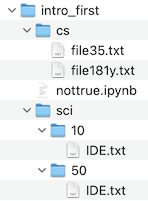

In [55]:
from IPython import display
#
# this is in the hw1pr1 folder
#
display.Image("./intro_first_ss_small.png")   # local image

See if you can match the _syntactic_ structure (the text!) with the _visual_ structure (the image!) 

<hr>

Onward!

In [56]:
path = "./intro_first"          # any path to any folder
result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # try c:/  (it took my machine 12.7 seconds!)
print(f"{result = }")

len(result) = 5
result = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


#### Now, let's incorporate ``os.walk`` into a series of functions...

In [57]:
#
# Steppingstone, Version 1: call os.walk, return length, optionally print
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    # print(f"{len(result) = }")
    # print(f"{result = }")
    num_folders = len(result)        # the len is the number of folders...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "/Users/isabelburger"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 24066

[[ Fin. ]]


Ok!  But we didn't actually "walk" the folders -- or files! 

That is, we only counted, and didn't <u>consider</u>, each one...

Let's print all of the folder names!


In [29]:
#
# Steppingstone, Version 2: print all of the folder names!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath: continue         # skip the rest of _this_ loop iteration: back to top
        print(f"{currentpath = }")   # try non-f printing: it's worse!

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./files_challenge"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './files_challenge'
currentpath = './files_challenge/phonebook 2021'
currentpath = './files_challenge/phonebook 2020'
currentpath = './files_challenge/phonebook 2020/more'
currentpath = './files_challenge/phonebook 2020/more/test'
currentpath = './files_challenge/phonebook 2020/more/test/sub1'
currentpath = './files_challenge/phonebook 2020/more/test/sub1/superSub1'
currentpath = './files_challenge/phonebook 2020/more/test/sub1/superSub1/superDuperSub2'
currentpath = './files_challenge/phonebook 2020/more/test/sub1/superSub1/superDuperSub2/deeply_hidden_folder'
currentpath = './files_challenge/phonebook 2020/more/test/sub1/superSub1/superDuperSub2/deeply_hidden_folder/a'
currentpath = './files_challenge/phonebook 2020/more/test/sub1/superSub1/superDuperSub2/deeply_hidden_folder/a/c'
currentpath = './files_challenge/phonebook 2020/more/test/sub1/superSub1/superDuperSub2/deeply_hidden_folder/a/c/fortytwo'
currentpath = './files_challenge/phonebook 2020/more/te

If you're on Windows, you likely see some "hidden MACOSX" directories, ``__MACOSX``

<font color="DodgerBlue"><b>Task!</b></font> 

Change the above code so that it _skips_ any path that contains the string ``__MACOSX``

We'll do this together...

<hr>

But, we want to see the files!

Let's print all their full filenames (the full paths)!

In [58]:
#
# Steppingstone, Version 3: walk all of the files, printing each one's fullpath
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...

        if '__MACOSX' in currentpath: continue         # skip the rest of _this_ loop iteration: back to top

        print(f"{currentpath = }") 
        
        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"{contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./files_challenge"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './files_challenge'
currentpath = './files_challenge/phonebook 2021'
   fullpath = './files_challenge/phonebook 2021/0173.txt'
   fullpath = './files_challenge/phonebook 2021/0167.txt'
   fullpath = './files_challenge/phonebook 2021/0198.txt'
   fullpath = './files_challenge/phonebook 2021/0007.txt'
   fullpath = './files_challenge/phonebook 2021/0013.txt'
   fullpath = './files_challenge/phonebook 2021/0205.txt'
   fullpath = './files_challenge/phonebook 2021/0211.txt'
   fullpath = './files_challenge/phonebook 2021/0210.txt'
   fullpath = './files_challenge/phonebook 2021/0204.txt'
   fullpath = './files_challenge/phonebook 2021/0012.txt'
   fullpath = './files_challenge/phonebook 2021/0006.txt'
   fullpath = './files_challenge/phonebook 2021/0199.txt'
   fullpath = './files_challenge/phonebook 2021/0166.txt'
   fullpath = './files_challenge/phonebook 2021/0172.txt'
   fullpath = './files_challenge/phonebook 2021/0201v2.txt'
   fullpath = './files_challeng

**Aside**: &nbsp;&nbsp; It's possible to assemble paths using the operating system's "correct" character:

In [59]:
os.path.join("/root/Users/secret_stuff" , "file_name")

'/root/Users/secret_stuff/file_name'

Notice that it _joined_ the path and the file.

<br>

Since Python is happy with ``/`` we'll use that for now.

<hr>

#### But, we want to get all of the files' _contents_  !

<u>Notice</u> there are lots of files named ``".DS_Store"`` ...

They are binary data used by MacOS - they will cause trouble!

Let's see the trouble, and then fix it:

In [60]:
#
# Steppingstone, Version 4: walk all of the files, printing (bits of) each one's contents!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            print(f"   {contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
decoding error: ./intro_first/.DS_Store
   contents[0:42] = ''
   fullpath = './intro_first/nottrue.ipynb'
   contents[0:42] = "Hi, everyone in cs35!\n\nAs you're seeing, t"
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
decoding error: ./intro_first/cs/.DS_Store
   contents[0:42] = ''
   fullpath = './intro_first/cs/file35.txt'
   contents[0:42] = 'CS for Insight'
   fullpath = './intro_first/cs/file181y.txt'
   contents[0:42] = 'CS for Inquiry'
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
decoding error: ./intro_first/sci/.DS_Store
   contents[0:42] = ''
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
   contents[0:42] = 'Jupyter notebooks'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
   contents[0:42] = 'Colab notebooks'
result = 5

[[ Fin. ]]


#### The encoding was wrong!  

(Those ``.DS_store`` files are binary, not human-readable.)

We could change to, say, latin-1 and see the bytes. But, let's not...

We really just want to _algorithmically_ skip over those files. Let's try it:

<font color="DodgerBlue"><b>Task to try</b></font>

Add an if statement in the above "steppingstone function" in order to simply skip over any file that begins with a dot (a period character: ``"."``)

Then, run it again. (It's ok to leave those dot files' pathnames - or not...)

<hr>

####  Two examples leading into our 10,000-file challenges! 

<u>Example 1</u> &nbsp; Let's count how many ``.txt`` files we have... 

In [61]:
#
# Rolodex lead-in, example1: counting the number of .txt files...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            if file[-4:] == ".txt":
                print("Found a .txt file! Adding one...")
                count_txt += 1
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return count_txt   # phew, we're finally returning something else!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"num txt files = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
Found a .txt file! Adding one...
   fullpath = './intro_first/cs/file181y.txt'
Found a .txt file! Adding one...
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
Found a .txt file! Adding one...
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
Found a .txt file! Adding one...
num txt files = 4

[[ Fin. ]]


<font color="DodgerBlue"><b>This is an example</b></font> of a short (1-3 sentence) markdown cell, giving interpretation and context for the above result...

#### Number of ``.txt`` files
  + It seems that this folder, ``intro_first`` has four (4) ``.txt`` files.  This seems reasonable!
  + We could go further and see what _percentage_ of files are ``.txt`` ... 
  + It's also worth noting that we're trusting the file extension ``.txt`` here: some text files could be masquerading as other things... 😊?!

The key idea is to ...
  + share the results found, contextualized for us sapiens ...
  + consider what else could be done, even if we're not doing so ...
  + note possible incompletenesses, countervailing forces, concerns in general ...
  + use emojis 🦔 !

<hr>

####  Second example: using file *contents* 

<u>Example 2</u> &nbsp; Let's count how many of the ``.txt`` files contain the substring ``'CS'`` -- not in the filename, but in the file ***contents***

In [62]:
#
# Rolodex lead-in, example2: counting the number of .txt files containing 'CS' ...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files
    count_CS = 0     # keep count of 'CS' substrings found

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot

            if file[-4:] == ".txt":
                # print("Found a .txt file! Adding one...")
                count_txt += 1
                contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
                if 'CS' in contents:
                    print("        *** Found a 'CS' ... adding 1    (aka 2-True)")
                    count_CS += 1
                # print(f"   {contents[0:42] = }")

    return count_CS, count_txt   # oooh... we can return two things!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    count_CS, count_txt = result
    print()
    print(f"num txt files       = {count_txt}")  
    print(f"num containing CS   = {count_CS}")  
    perc = count_CS*100/count_txt
    print(f"for a CS percentage of {perc:5.2f}%")   # :5.2f means width of 5, 2 dec. places, for a _floating pt value

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
        *** Found a 'CS' ... adding 1    (aka 2-True)
   fullpath = './intro_first/cs/file181y.txt'
        *** Found a 'CS' ... adding 1    (aka 2-True)
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'

num txt files       = 4
num containing CS   = 2
for a CS percentage of 50.00%

[[ Fin. ]]


<font color="Coral"><b>Results:</b></font> 

#### Number of ``CS``-content ``.txt`` files
  + It seems that this folder, ``intro_first`` has two ``'CS'``-containing ``.txt`` files, out of four total ``.txt`` files, that is, ``50%`` <br><br>
  + <u>Reflection</u>: _This seems computationally balanced._ <br><br>
  + <u>Opportunities</u>: We could go further and try this in larger folders - such as this whole machine! Or, we could look for other things (like phone numbers or names in various formats). Or, really, we could ask-and-answer almost any algorithmic question about any subset of files on any machine at all... <br><br>
  +   _The fox knows many things, but the hedgehog knows one big thing._ - [Archilochus](https://www.goodreads.com/author/quotes/7614908.Archilochus#:~:text=Archilochus%20Quotes&text=We%20don't%20rise%20to,the%20level%20of%20our%20training.&text=The%20fox%20knows%20many%20things,hedgehog%20knows%20one%20big%20thing.&text=Heart%2C%20my%20heart%2C%20so%20battered,the%20men%20who%20hate%20us.) 🦔 

#### Trying other directories/folders

The ``path`` can be _any_ folder on your local machine, allowing for _arbitrary_ local exploration and discovery...

For example, this next cell will count <font color="Coral"><b>how many folders</b></font> do I have, starting at some ``path``
+ to count <font color="Coral"><b>files</b></font>, you'll need to build from the examples above

In [39]:
path = "./intro_first"          # any path to any folder?!  intro_first contains _5_ folders total
# path = "./intro_second"       # any path to any folder?!  intro_second contains _12_ folders total
# path = "./files_challenge"    # this is the really large folder: it contains _23_ folders total

# path = "C:/"                  # could use C:/  on windows or "/" on MacOS  
# path = "."                    # could use "." for the current directory

result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # this took my machine 2m 47.4s seconds (for "/" with total 555695 folders)
                                # and, it asked for permission a couple of times (I said no.)
#print(f"{result = }")          # let's _not_ print it out...

len(result) = 5


#### <font color="DodgerBlue"><b>Your task</b></font>: The Rolodex challenge!
+ Here is [the homework page that describes hw1's challenges...](https://docs.google.com/document/d/1SXgPlR00aIxahDi3OYR8y9-AODNwBuLbQsLLt9AKSa4/edit)
+ A few questions are "our" design
+ Then, ask-and-answer more are of _your_ design
+ And, you'll answer _your_ questions from at least two other "root" directories (the ``path`` that gets everything started is sometimes called the "root": the folder whose files your functions _walk_! :)
+ Create a short <font color="Coral"><b>Results:</b></font> section after each of "our" and _your_ questions. Feel free to use the template above.
+ Good luck, walking <i>far more</i> than one thousand files!

<br>


In [14]:
#
# How many .txt files are in the entire files_challenge folder?
#

import os
import os.path

def txt_counter(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and counts the total number of .txt files
    """
    result = list(os.walk(path)) 
    
    count_txt = 0    # keep count of our .txt files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            if file[0] == ".": continue      # skip files that start with dot
            if file[-4:] == ".txt": 
                count_txt += 1  # Found a .txt file! Adding one...

    return count_txt   

#
# when discovering, keep your data close (and your functions closer!)
#
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    result = txt_counter(path)   

    print(f"num txt files = {result}")  



num txt files = 6361


In [331]:
#
# What is the maximum depth of directories in the entire folder?
#

import os
import os.path

def count(string, e):
    count = 0
    for x in string:
        if x == e:
            count += 1
    return count 

def max_depth(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then finds the maximum depth 
    """
    result = list(os.walk(path))     
    
    maxDepth = 1    # keep count of the maximum depth

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        if (count(currentpath, '/') + 1) > maxDepth:
            maxDepth = count(currentpath, '/')+1
            #print(currentpath)
    return maxDepth

if True:
    path = "./files_challenge"       # Remember: . means the current directory
    result = max_depth(path)   # Run!
    print(f"The maximum depth of directories in the folder {path} is {result}")  

The maximum depth of directories in the folder ./files_challenge is 12


In [18]:
def getNum(contents):
    number = ''
    for i in range(len(contents)):
        if contents[i] in '0123456789':
            number += contents[i]
    return number 


In [257]:
#
# Across all of the files, how many of the phone numbers contain exactly 10 digits? 7 digits? 11 digits? 
#


import os
import os.path

def countDigits(path, num):
    """ starting from the input, named path and the given number of digits num 
        
        this function "walks" the whole path, including subfolders
        and counts the number of phone numbers with that number of digits

    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    count = 0 # keep track of the number of phone numbers of length num 

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue

        for file in files:   
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot 
            fullpath = currentpath + "/" + file          
            if file[0] == ".": continue      # skip files that start with dot
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            if (len(getNum(contents))) == num: 
                count += 1

    return count 

if True:
    
    path = "./files_challenge"       # Remember: . means the current directory
    resultSev = countDigits(path, 7)   
    resultElev = countDigits(path, 11)
    resultTen = countDigits(path, 10)

    print(f"num phone numbers of length 7 = {resultSev}")  
    print(f"num phone numbers of length 11 = {resultElev}")
    print(f"num phone numbers of length 10 = {resultTen}")


num phone numbers of length 7 = 670
num phone numbers of length 11 = 102
num phone numbers of length 10 = 5283


In [256]:
#
# How many of the 10 digit phone numbers have the 909 area code?  
#


import os
import os.path

def countAreaCode(path, s):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    countAC = 0    # keep count of phone numbers with a specific area code

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            phoneNum = getNum(contents)
            if len(phoneNum) == 10:
                areaCode = phoneNum[0:3]
                if areaCode == s:
                    countAC += 1

    return countAC 
#
# when discovering, keep your data close (and your functions closer!)
#
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    ac = '909'
    result = countAreaCode(path, ac)   # Run!

    print(f"num phone numbers with area code {ac} = {result}")  # Yay for f-strings!


num phone numbers with area code 909 = 597


<font color="Coral"><b>Results:</b></font> 

#### File counting and phone numbers
  + It seems that this folder, files_challenge has a ``total of 6361 .txt files``
  + The ``maximum depth within files_challenge is 12`` with the path ./files_challenge/phonebook 2020/more/test/sub1/superSub1/superDuperSub2/deeply_hidden_folder/a/c/fortytwo
  + The files_challenge folder contains ``671 phone numbers of length 7, 102 phone numbers of length 11 and 5283 of length 10``. 
  + I counted ``597 phone numbers with the area code 909``

##### Reflection
  + There are a lot of .txt files and a lot of folders in the files_challenge folder! It is impressive that we are able to look through all of them and extract information like phone number length and area code so rapidly using Python. 


In [200]:
import string

def getFirstName(text):
    #
    # This function takes a text file, assuming the structure that it is two lines, with the name on the second line, and splits it into the name
    # portion, trims the edges of any whitespace, and locates and returns the first name
    #

    fName = ''
    comma = False
    commaLoc = 0
    spaceLoc = 0 
    text = text.split('\n')[1]
    text = text.strip()
    for i in range(len(text)):
                if text[i] == ',':
                    commaLoc = i
                    comma = True
                elif text[i] == ' ':
                     spaceLoc = i
    if comma == False:
        for k in range(0, spaceLoc):
            if text[k] == ' ':
                break 
            fName += text[k]
    else:
        for l in range(commaLoc+1, len(text)):
            if text[l] != ' ':
                fName += text[l]
    fName = fName.lower()
    return fName


In [189]:
import string

def getLastName(text):
    #
    # This function takes a text file, assuming the structure that it is two lines, with the name on the second line, and splits it into the name
    # portion, trims the edges of any whitespace, and locates and returns the last name
    #

    lName = ''
    comma = False
    commaLoc = 0
    spaceLoc = 0
    text = text.split('\n')[1]
    text = text.strip()
    for i in range(len(text)):
                if text[i] == ',':
                    commaLoc = i
                    comma = True
                elif text[i] == ' ':
                     spaceLoc = i
    if comma == True:
        for i in range(0, commaLoc): 
            if text[i] != ' ':
                lName += text[i]
    else:
        for i in range(spaceLoc, len(text)):
            if text[i] != ' ':
                lName += text[i] 
    lName = lName.lower()
    return lName


In [255]:
#
# How many people have the first name Khaby?  D'Amelio?
#


import os
import os.path

def countFirstName(path, name):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then counts the number of files that have name as the first name 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    name = name.lower()
    countName = 0    # keep count of phone numbers with a specific area code

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            firstName = getFirstName(contents)
            if firstName == name:
                countName += 1
                #print(contents)

    return countName 
#
# when discovering, keep your data close (and your functions closer!)
#
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    ln = 'Khaby'
    result = countFirstName(path, ln)   # Run!
    print(f"The number of people with the first name {ln} in {path} is {result}.")  # Yay for f-strings!
    path = "./files_challenge"       # Remember: . means the current directory
    ln = 'D\'Amelio'
    result = countFirstName(path, ln)   # Run!
    print(f"The number of people with the first name {ln} in {path} is {result}.")  # Yay for f-strings
    


The number of people with the first name Khaby in ./files_challenge is 23.
The number of people with the first name D'Amelio in ./files_challenge is 8.


In [254]:
#
# How many people have the last name Khaby?  D'Amelio?
#


import os
import os.path

def countLastName(path, name):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then counts the number of files that have name as the first name 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    name = name.lower()
    countName = 0    # keep count of phone numbers with a specific area code

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            lastName = getLastName(contents)
            if lastName == name:
                countName += 1
                #print(contents)

    return countName 
#
# when discovering, keep your data close (and your functions closer!)
#
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    ln = 'Khaby'
    result = countLastName(path, ln)   # Run!
    print(f"The number of people with the last name {ln} in {path} is {result}!")  # Yay for f-strings!
    #path = "./files_challenge"       # Remember: . means the current directory
    ln = 'D\'Amelio'
    result = countLastName(path, ln)   # Run!
    print(f"The number of people with the last name {ln} in {path} is {result}")  # Yay for f-strings
    

The number of people with the last name Khaby in ./files_challenge is 4!
The number of people with the last name D'Amelio in ./files_challenge is 45


In [252]:
#
# How many people have the name Khaby or D'Amelio in their first or last name?
#

def countName(path, name):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then counts the number of files that have name as the first or last name
    """
    fn = countFirstName(path, name)
    ln = countLastName (path, name)
    sum = fn + ln
    return sum 

if True:

    path = "./files_challenge"       # Remember: . means the current directory
    name = 'Khaby'
    result = countName(path, name)   # Run!
    print(f"The number of people with the name {name} in {path} is {result}!")  # Yay for f-strings!

    path = "./files_challenge"       # Remember: . means the current directory
    name = 'D\'Amelio'
    result = countName(path, name)   # Run!
    print(f"The number of people with the name {name} in {path} is {result}!")  # Yay for f-strings!

The number of people with the name Khaby in ./files_challenge is 27!
The number of people with the name D'Amelio in ./files_challenge is 53!


In [249]:
def countChar(path, e):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then finds the file contents that have the most characters 'e' in the name 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    maxChar = 0    # keep count of the max number of characters in a name 

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            contents = contents.split('\n')
            if len(contents) > 4:
                continue
            if len(contents) >= 2: 
                contents = contents[1]
            else:
                contents = contents[0]
            contents = contents.strip()
            lc = contents.count(e.lower())
            uc = contents.count(e.upper())
            sum = lc + uc
            if sum >= maxChar:
                maxChar = sum
                maxName = contents
                #print(contents)
    return [maxName, maxChar]

if True:

    path = "./intro_first"       # Remember: . means the current directory
    char = 'i'
    result = countChar(path, char)   # Run!
    print(f"The name with the maximum number of \'{char}\' characters in {path} is: {result[0]} with {result[1]}!")  # Yay for f-strings!

    path = "./intro_second"       # Remember: . means the current directory
    char = 'i'
    result = countChar(path, char)   # Run!
    print(f"The name with the maximum number of \'{char}\' characters in {path} is: {result[0]} with {result[1]}!")  # Yay for f-strings!

    path = "./files_challenge"       # Remember: . means the current directory
    char = 'i'
    result = countChar(path, char)   # Run!
    print(f"The name with the maximum number of \'{char}\' characters in {path} is: {result[0]} with {result[1]}!")  # Yay for f-strings!


The name with the maximum number of 'i' characters in ./intro_first is: CS for Inquiry with 2!
The name with the maximum number of 'i' characters in ./intro_second is: KEVIN WILLIAMS with 3!
The name with the maximum number of 'i' characters in ./files_challenge is: Wisnieski, Cindi with 5!


In [248]:
def numChar(path, e, N):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then finds the file contents that have N number of character 'e' in the name 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    nameList = []   # keep count of the strings that contain N number of 'e's 

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            contents = contents.split('\n')
            if len(contents) > 4:
                continue
            if len(contents) >= 2: 
                contents = contents[1]
            else:
                contents = contents[0]
            
            contents = contents.strip()
            lc = contents.count(e.lower())
            uc = contents.count(e.upper())
            sum = lc + uc
            if sum == N:
                nameList += [contents]
    return [len(nameList), nameList] 


if True:
    path = "./intro_first"       # Remember: . means the current directory
    char = 'i'
    num = 3
    result = numChar(path, char, num)   # Run!
    print(f"There are {result[0]} names in {path} with {num} \'{char}\' characters: {result[1]}!")  # Yay for f-strings!

    path = "./intro_second"       # Remember: . means the current directory
    char = 'i'
    num = 3
    result = numChar(path, char, num)   # Run!
    print(f"There are {result[0]} names in {path} with {num} \'{char}\' characters: {result[1]}!")  # Yay for f-strings!

    path = "./files_challenge"       # Remember: . means the current directory
    char = 'i'
    num = 3
    result = numChar(path, char, num)   # Run!
    print(f"There are {result[0]} names in {path} with {num} \'{char}\' characters: {result[1]}!")  # Yay for f-strings!



There are 0 names in ./intro_first with 3 'i' characters: []!
There are 2 names in ./intro_second with 3 'i' characters: ['ERIC WILLIAMS', 'KEVIN WILLIAMS']!
There are 289 names in ./files_challenge with 3 'i' characters: ['Yiyi Davis', 'Willie Smith', 'Qing HerreraVicioso', 'William Rico', 'Addison Saint-Germain', 'Wiedmaier, Chris', 'Banfield, Williemae', 'Whittman, Miki', 'Willian Fineout', 'Kirsten Leidig', 'Micheline Frishkorn', 'Martiniz, Francine', 'Lorie Scheiblich', 'Michaela Yoshizumi', 'Macie Indovina', 'Winnicki, Aretha', 'Sanjuanita Mizukami', 'Angeline Rudicil', 'Vivian Balaji', 'Vivian Balaji', 'Twicken, Vivian', 'Vivian Aguilar', 'Ananthakrishnan, Vivian', 'Vivian Villalon', 'Vivian Balaji', 'Aguilar, Vivian', 'Balaji, Vivian', 'Vivian Suzuki', 'Vivian Balaji', 'Dixie Silva', 'Zirui Shi', 'Guggenheim, Billie', 'Dixie Feria', 'Smith, Hiroaki', 'Qin, Willie', 'Saint-Germain, Niana', 'Rivera, Kristina', 'Robinson, Dixie', 'Qin, Shivani', 'Saint-Germain, Blackpink', 'Knight

In [204]:
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    ln = 'CS35_Participant_3'
    result1 = countLastName(path, ln)   # Run!
    print(f"num people with last name {ln} = {result1}")  # Yay for f-strings!
    #path = "./files_challenge"       # Remember: . means the current directory
    fn = 'CS35_Participant_3'
    result2 = countFirstName(path, fn)   # Run!
    print(f"num people with first name {fn} = {result2}")  # Yay for f-strings

num people with last name CS35_Participant_3 = 17
num people with first name CS35_Participant_3 = 19


In [209]:
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    ln = 'Julien'
    result1 = countLastName(path, ln)   # Run!
    print(f"num people with last name {ln} = {result1}")  # Yay for f-strings!
    #path = "./files_challenge"       # Remember: . means the current directory
    fn = 'CS35_Participant_9'
    result2 = countFirstName(path, fn)   # Run!
    print(f"num people with first name {fn} = {result2}")  # Yay for f-strings

num people with last name Julien = 57
num people with first name CS35_Participant_9 = 29


<font color="Coral"><b>Results:</b></font> 

#### Names: First and Last
  + Counting ``3 'i's``: 0 in intro_first, 2 in intro_second (ERIC WILLIAMS and KEVIN WILLIAMS) and ``289 in files_challenge``. 
  + Counting ``max 'i's``: 2 in intro_first, 3 in intro_second and 5 in files_challenge, with ``Cindi Wisnieski``
  + Counting ``'Khaby'``: appears in files_challenge ``27 times``: 4 times as a first name and 23 times as a last name. 
  + Counting ``'D'Amelio'``: appears in files_challenge ``53 times``: 45 times as a last name and 8 times as a first name. 
  + Counting ``my name``: CS35_Participant_3 appears as a last name ``17 times``, CS35_Participant_3 appears as a first name ``19 times``. 
  + Counting other names: ``CS35_Participant_9 appeared 29 times`` as a first name and ``Julien appeared 57 times`` as a last name!

  ##### Reflection
  + This is a very interesting data set of names: Khaby and D'Amelio showed up many times each, but the first name 'Julie' showed up zero times! That's how I ended up looking at the last name 'Julien' because I went to confirm that Julie showed up zero times and only found files with the name Julien. The name CS35_Participant_9 showed up many times, which was what I expected. 


In [259]:
#
# How many of the phone numbers contain the substring '42'?  
#


import os
import os.path

def subString_phoneNum(path, s):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then counts the number of phone numbers containing the substring s 

    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    countSS = 0    # keep count of phone numbers with the substring s

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            phoneNum = getNum(contents)
            if s in phoneNum:
                countSS += 1

    return countSS 
#
# when discovering, keep your data close (and your functions closer!)
#
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    substring = '42'
    result = subString_phoneNum(path, substring)   # Run!

    print(f"The number of phone numbers containing the substring {substring} in {path} is {result}")  # Yay for f-strings!


The number of phone numbers containing the substring 42 in ./files_challenge is 1180


In [286]:
#
# How many of the phone numbers are 'symmetrical' and what are they?
#
import os
import os.path

def symmetrical(s):
    if len(s) < 2:
        #print('short!')
        return True
    elif s[0] == s[-1]:
        #print(s[1:len(s)-1])
        return symmetrical(s[1:len(s)-1])
    else: 
        return False

def symmetrical_phoneNums(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and counts and returns all phone numbers that are 'symmetrical'

    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    countSym = 0    # keep count of phone numbers that are symmetrical
    listSym = [] # keep count of list of phone numbers that are symmetrical 

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            phoneNum = getNum(contents)
            if phoneNum != '' and symmetrical(phoneNum) == True:
                countSym += 1
                listSym += [phoneNum]
                #print(f"   {fullpath = }")

    return [countSym, listSym]
#
# when discovering, keep your data close (and your functions closer!)
#
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    result = symmetrical_phoneNums(path)   # Run!

    print(f"The number of phone numbers that are symmetrical in {path} is {result[0]}: the numbers {result[1][0]} and {result[1][1]}")  # Yay for f-strings!




The number of phone numbers that are symmetrical in ./files_challenge is 2: the numbers 4127777214 and 2462642


In [305]:
#
# What are the most common last name in the dataset? 
#


import os
import os.path


def mostCommonLastName(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and counts and returns the last name with the most instances

    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    lnameDict = {}

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[-4:] != ".txt": 
                continue
            if file[0] == ".": continue      # skip files that start with dot
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            lastName = getLastName(contents)
            if lastName != '':
                if lastName in lnameDict:
                      lnameDict[lastName] += 1
                else:
                    lnameDict[lastName] = 1
    maxName = max(lnameDict, key = lnameDict.get)
    maxNum = lnameDict[maxName]
    return [maxName, maxNum]
if True:

    path = "./files_challenge"       # Remember: . means the current directory
    result = mostCommonLastName(path)   # Run!

    print(f"The most common name in {path} is {result[0]} with {result[1]} instances.")  # Yay for f-strings!



The most common name in ./files_challenge is li with 191 instances.


<font color="Coral"><b>Results:</b></font> 

#### Extra three questions on the files_challenge dataset
  + I found the most common last name to be ``Li with 191 instances``
  + I found ``two symmetrical phone numbers`` in the dataset: 4127777214 and 2462642
  + I found that ``1180 phone numbers contain the substring '42'``


##### Reflection
  + I appreciated the opportunity to refresh my knowledge on using dictionaries for the 'most common name' question -- I initially tried to solve the problem just using a lot of nested loops and it was way too slow to ever complete. Using a dictionary made the problem a  lot easier and faster!
  + I expected there to be a few more 'symmetrical' phone numbers, but it was interesting to see the two that did exist in the dataset
  + A lot of the phone numbers contained the substring '42'! Perhaps not too surprising given the relative length of that substring and the total phone number lengths 

In [317]:
#
# File counter counts all the files contained in  a given path
#

import os
import os.path

def file_counter(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and counts the total number of files
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list..
    fileCount = 0

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[0] == ".": continue      # skip files that start with dot
            fileCount += 1
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return fileCount

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    path = "/Users/isabelburger/Documents/Previous Classes"       # Remember: . means the current directory
    result = file_counter(path)   # Run!

    print(f"There are {result} files in {path}")  # Yay for f-strings!



There are 1236 files in /Users/isabelburger/Documents/Previous Classes


In [330]:
#
# File counter counts all the files contained in  a given path
#

import os
import os.path

def filetype_counter(path, filetype):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and counts the total number of files of type filetype
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list..
    fileCount = 0

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            
            if file[-(len(filetype)):] != filetype: 
                continue
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[0] == ".": continue      # skip files that start with dot
            fileCount += 1
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return fileCount

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    path = "/Users/isabelburger/Documents/Previous Classes" # Remember: . means the current directory
    filetype = '.ino'
    result = filetype_counter(path, filetype)   # Run!

    print(f"There are {result} files of type {filetype} in {path}")  # Yay for f-strings!


There are 146 files of type .ino in /Users/isabelburger/Documents/Previous Classes


In [334]:
if True:
    path = "/Users/isabelburger/Documents/Previous Classes" 
    result = max_depth(path)   # Run!
    print(f"The maximum depth of directories in the folder {path} is {result}")  

The maximum depth of directories in the folder /Users/isabelburger/Documents/Previous Classes is 12


In [359]:
#
# Most common file extension present in the given path
#

import os
import os.path

def filetype_max(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and creates a dictionary of each file type and the corresponding number of files 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list..
    fileTypes = {}

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        #print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if file[0] == ".": continue      # skip files that start with dot
            if '.' not in file:
                continue
            else:
                for i in range(len(file)):
                    if file[i] == '.':
                        dotLoc = i
                filetype = file[dotLoc:]
            if filetype in fileTypes:
                 fileTypes[filetype] += 1
            else:
                 fileTypes[filetype] = 1
            
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            #print(f"   {fullpath = }")
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")
        maxType = max(fileTypes, key = fileTypes.get, default = 0)
        if maxType != 0: 
            maxNum = fileTypes[maxType]
    return [maxType, maxNum, fileTypes]


if True:
    path = "/Users/isabelburger/Documents/Previous Classes" # Remember: . means the current directory
    result = filetype_max(path)   # Run!
    print(f"The most common file type is {result[0]} with {result[1]} total files in {path}")  # Yay for f-strings!
    print(f"The breakdown of file types is as follows: {result[2]}")  # Yay for f-strings!



The most common file type is .TXT with 400 total files in /Users/isabelburger/Documents/Previous Classes
The breakdown of file types is as follows: {'.mp4': 2, '.pdf': 34, '.png': 42, '.gif': 4, '.xlsx': 7, '.cdxml': 12, '.docx': 19, '.xls': 4, '.CSV': 1, '.ino': 146, '.dmg': 1, '.zip': 3, '.ino 2': 1, '.h': 214, '.txt': 44, '.mk': 5, '.md': 33, '.cpp': 48, '.c': 6, '.properties': 17, '.py': 37, '.sh': 3, '.yml': 3, '.wav': 16, '.pde': 3, '.adoc': 1, '.jpg': 3, '.WAV': 42, '.TXT': 400, '.clc': 3, '.lock': 5, '.bucket': 3, '.pse': 11, '.pdb': 4, '.lic': 1, '.dotx': 1, '.csv': 1, '.seq': 1, '.jpeg': 1, '.gjf': 4, '.ipynb': 4, '.jsf': 5, '.hmmm': 10, '.pyc': 2, '.log': 9, '.tif': 6, '.pptx': 2, '.stl': 1, '.chk': 3}


In [367]:
#
# How many files contain my name in the file name? 
#

import os
import os.path

def name_counter(path, name):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and counts the total number of .txt files
    """
    result = list(os.walk(path)) 
    fileList = []
    
    nameCount = 0    # keep count of how many files contain the string 'name' (case insensitive)

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  
        if '__MACOSX' in currentpath:  continue

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            if file[0] == ".": continue      # skip files that start with dot
            if '.DS_Store' in file: continue         # skip the rest of _this_ loop iteration: back to top
            if name.lower() in file.lower():
                nameCount += 1
                fileList += [file]

    return [nameCount, fileList]  

if True:
    path = "/Users/isabelburger/Documents/Previous Classes" # Remember: . means the current directory
    name = 'CS35_Participant_3'
    result = name_counter(path, name)   # Run!
    print(f"The name {name} appears in file names {result[0]} number of times in {path} in the files: {result[1]}")  # Yay for f-strings!

    path = "/Users/isabelburger/Documents/Previous Classes" # Remember: . means the current directory
    name = 'CS35_Participant_3'
    result = name_counter(path, name)   # Run!
    print(f"The name {name} appears in file names {result[0]} number of times in {path} in the files: {result[1]}")  # Yay for f-strings!


The name CS35_Participant_3 appears in file names 11 number of times in /Users/isabelburger/Documents/Previous Classes in the files: ['CS35_Participant_3, CS35_Participant_3 - Lewis Structure Group Problem.pdf', 'Chemistry Seminar - CS35_Participant_3.pdf', 'hw5pr4_division_burger_isabel.png', 'hw5pr3_multiplication_burger_isabel.png', 'hw5pr1_XOR_Burger_Isabel.png', 'hw5pr1_fulladder_Burger_Isabel.png', 'hw5pr1_ripplecarry_Burger_Isabel.png', 'hw5pr2_prime_burger_isabel.png', 'WebMO Modeling Investigation Lab Report_164_isabel_burger.pptx', 'Maestro Conformational Search Lab Report_164_isabel_burger.pdf', 'GaussView Gaussian Hydroboration Lab Report_164_isabel_burger.pptx']
The name CS35_Participant_3 appears in file names 11 number of times in /Users/isabelburger/Documents/Previous Classes in the files: ['CS35_Participant_3, CS35_Participant_3 - Lewis Structure Group Problem.pdf', 'Chemistry Seminar - CS35_Participant_3.pdf', 'hw5pr4_division_burger_isabel.png', 'hw5pr3_multiplicatio

In [371]:
#

import os
import os.path

def fullest_folder(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and finds the folder with the most number of files and folders within it 
    """
    result = list(os.walk(path)) 
    
    maxContents = 0    # keep count of how many files contain the string 'name' (case insensitive)

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple
        countContents = len(subfolders) + len(files)
        if '__MACOSX' in currentpath:  continue
        if countContents >= maxContents:
            maxContents = countContents
            max = currentpath  

    return [max, maxContents]

if True:
    path = "/Users/isabelburger/Documents/Previous Classes" # Remember: . means the current directory
    result = fullest_folder(path)   # Run!
    print(f"The fullest folder in is {result[0]} with {result[1]} files or subfolders directly within it.")  # Yay for f-strings!


The fullest folder in is /Users/isabelburger/Documents/Previous Classes/Arduino/libraries/WaveHC/FilesForExamples/fill with 400 files or subfolders directly within it.


<font color="Coral"><b>Results:</b></font> 

#### Exploring your own files! 
  + I found that there were many more files than expected in my 'Previous Classes' folder: ``1236 total files``!
  + I found that I had ``146 .ino files`` which was the most of several I tested: .png, .tif, .docx, .xls, .py, .jpg. These are Arduino files from an electronics class I took. 
  + In the 'Previous Classes' folder, the ``maximum depth is 12``
  

#### Three of my own questions
  + What is the breakdown of file types and the most popular file type in my 'Previous Classes' folder? I found the ``max was .TXT with 400 files``, but that there were many other file types within this folder, including .pde, .pse and .hmmm 
  + How many of the files have my first or last name in the title? Surprisingly, only ``11 files have my first name or last name`` of the 1236
  + What is the most full folder (counting both files and subfolders?) The ``/Users/isabelburger/Documents/Previous Classes/Arduino/libraries/WaveHC/FilesForExamples/fill`` folder has ``400 folders and files`` directly within it

##### Reflection
  + This was fun because it showed me I can use this to learn more about my own files and deal with large quantities of files/folders. 
  + It also made me realize how many folders and files there are in my computer that were created by programs like Arduino, which I previously had no idea stored so many additional files on my machine...